# 1) Problem Statement
Understanding how the students performance is affected by other values. such as Gender, Ethicity, Parental level of education, Lunch and exam prep time etc

# Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

# 2) Data checks
- check missing values 
- check duplicates
- check data type
- check statistic data


# 2.1) Checking missing values


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No missing values found


# 2.2) checking duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

NO duplicate values  (to remove duplicates df = df.drop_duplicates())


# 2.3) Check data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 2.4) Checking unique values



In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Statistical Findings
- all the means are close to each othet
- standard deviations to in the range of 14-15.19
- min and max for math score are (0-100), for reading score(17-100), for writing score(10-100) 

# 3) Exploring Data

In [10]:
print("Categories in 'gender' Variable :    ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' Variable :    ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' Variable :    ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'Lunch' Variable :    ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' Variable :    ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' Variable :     ['female' 'male']
Categories in 'race/ethnicity' Variable :     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' Variable :     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'Lunch' Variable :     ['standard' 'free/reduced']
Categories in 'test preparation course' Variable :     ['none' 'completed']


In [11]:
#defining numerical features in the data set & other columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


print('we have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('we have {} categorical_features : {}'.format(len(categorical_features), categorical_features))


we have 3 numerical features : ['math score', 'reading score', 'writing score']
we have 5 categorical_features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# 3.1) Adding data "total score" and "average"

In [12]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in maths : {math_full}')
print(f'Number of students with full marks in writing_full : {writing_full}')
print(f'Number of students with full marks in reading_full : {reading_full}')

Number of students with full marks in maths : 7
Number of students with full marks in writing_full : 14
Number of students with full marks in reading_full : 17


In [14]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less marks in maths : {math_less_20}')
print(f'Number of students with less marks in writing_less : {writing_less_20}')
print(f'Number of students with less marks in reading_less : {reading_less_20}')

Number of students with less marks in maths : 4
Number of students with less marks in writing_less : 3
Number of students with less marks in reading_less : 1


## Insights 
- found all the full and less marks of the students from the dataset
- calculated totals and average of the numerical data given 

# 4) Data Visualization
## Visualize the given numercial data to make some understandings better 
- histogram
- kernal distribution function(KDF)

# 4.1) Histogram

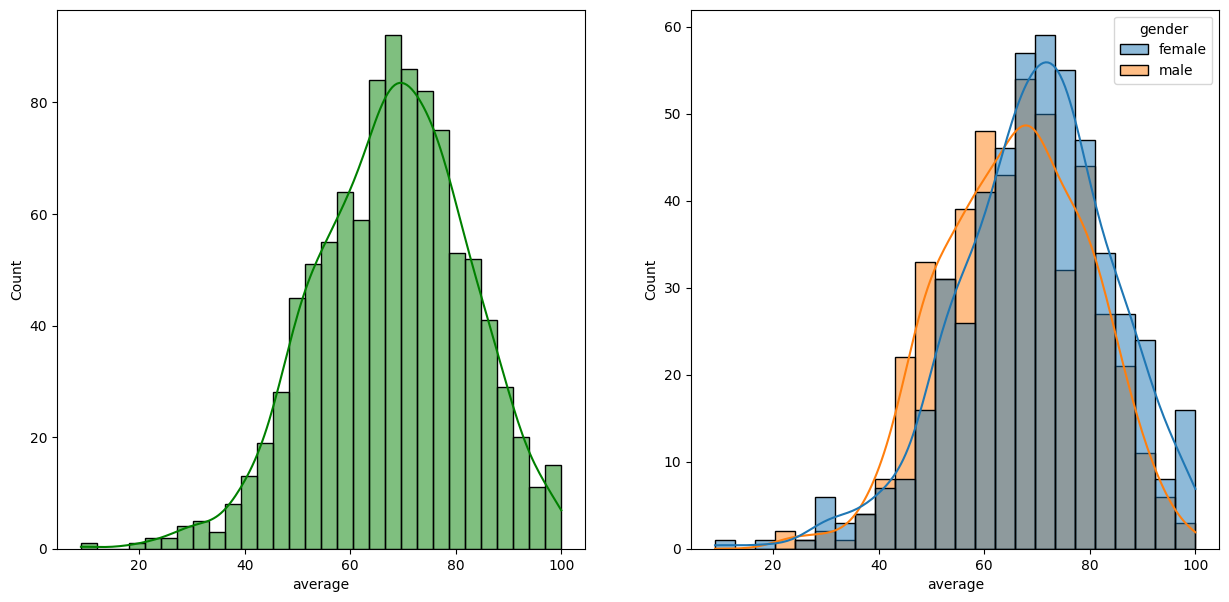

In [15]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data = df, x='average', kde=True, hue='gender')
plt.show()

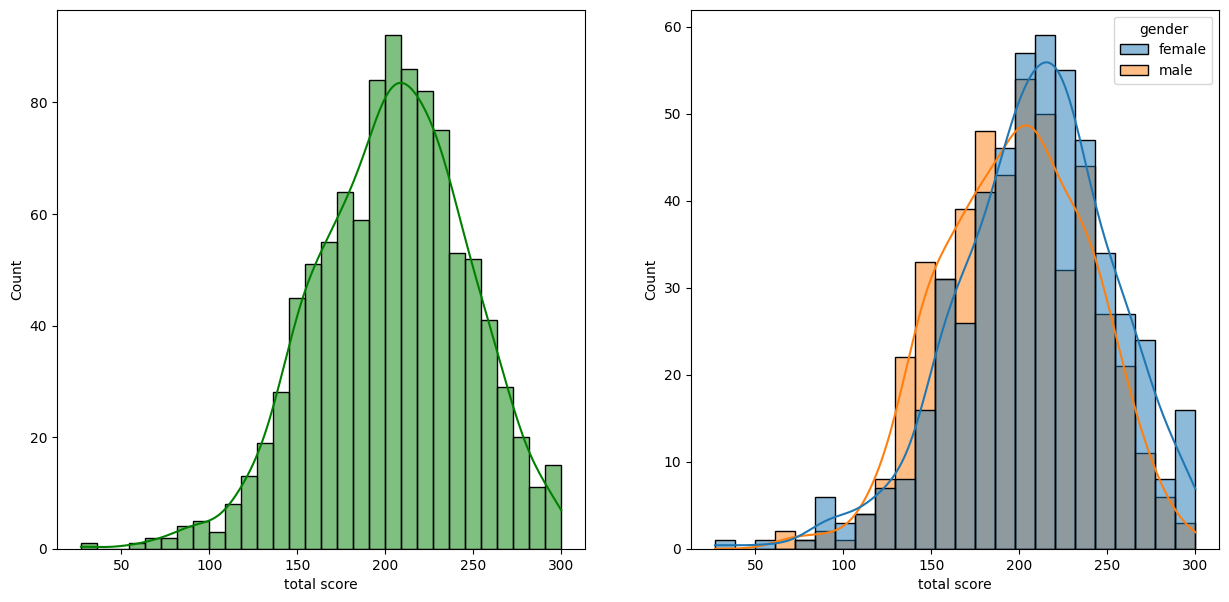

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data = df, x='total score', kde=True, hue='gender')
plt.show()

Female students perform well

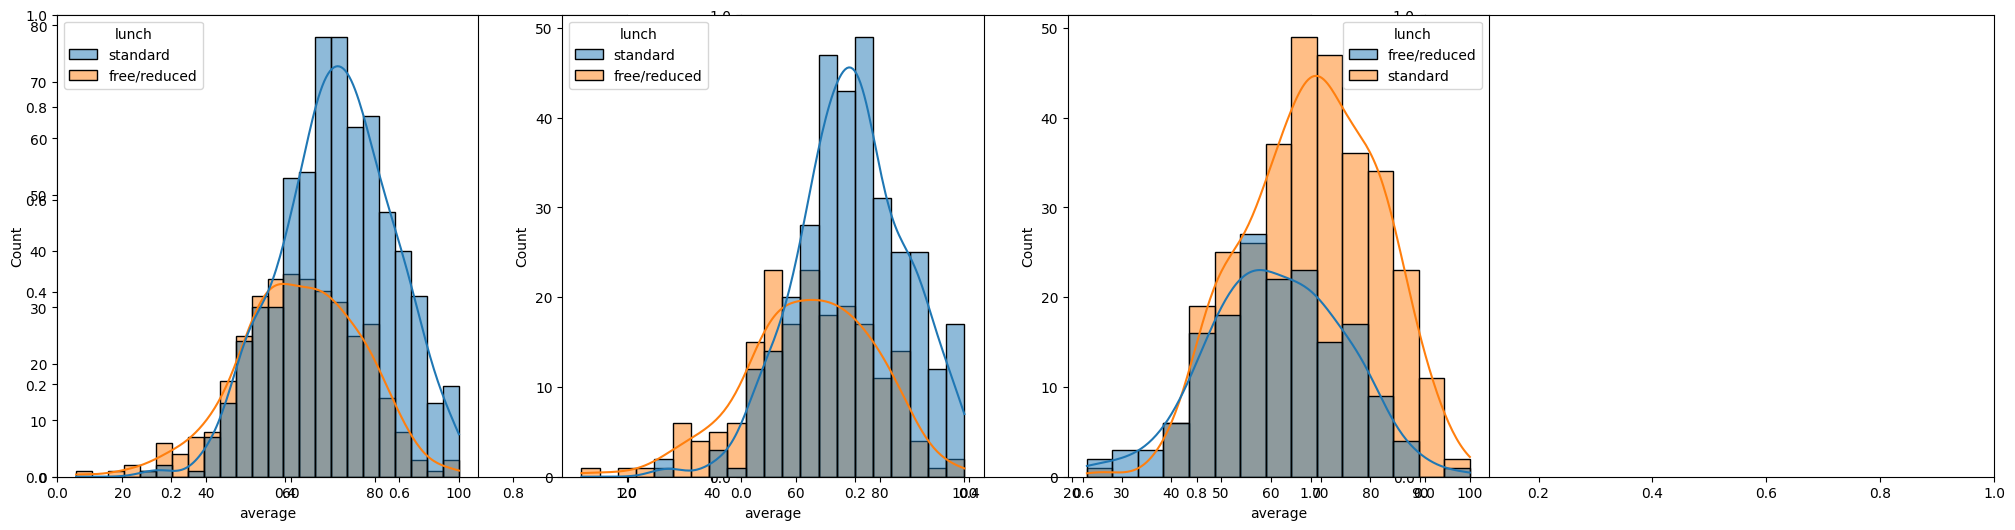

In [17]:
plt.subplots(1,3,figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

### insights
- standard lunch helps students perform well in exams
- standard lunch helps perform well in exams be it male or female

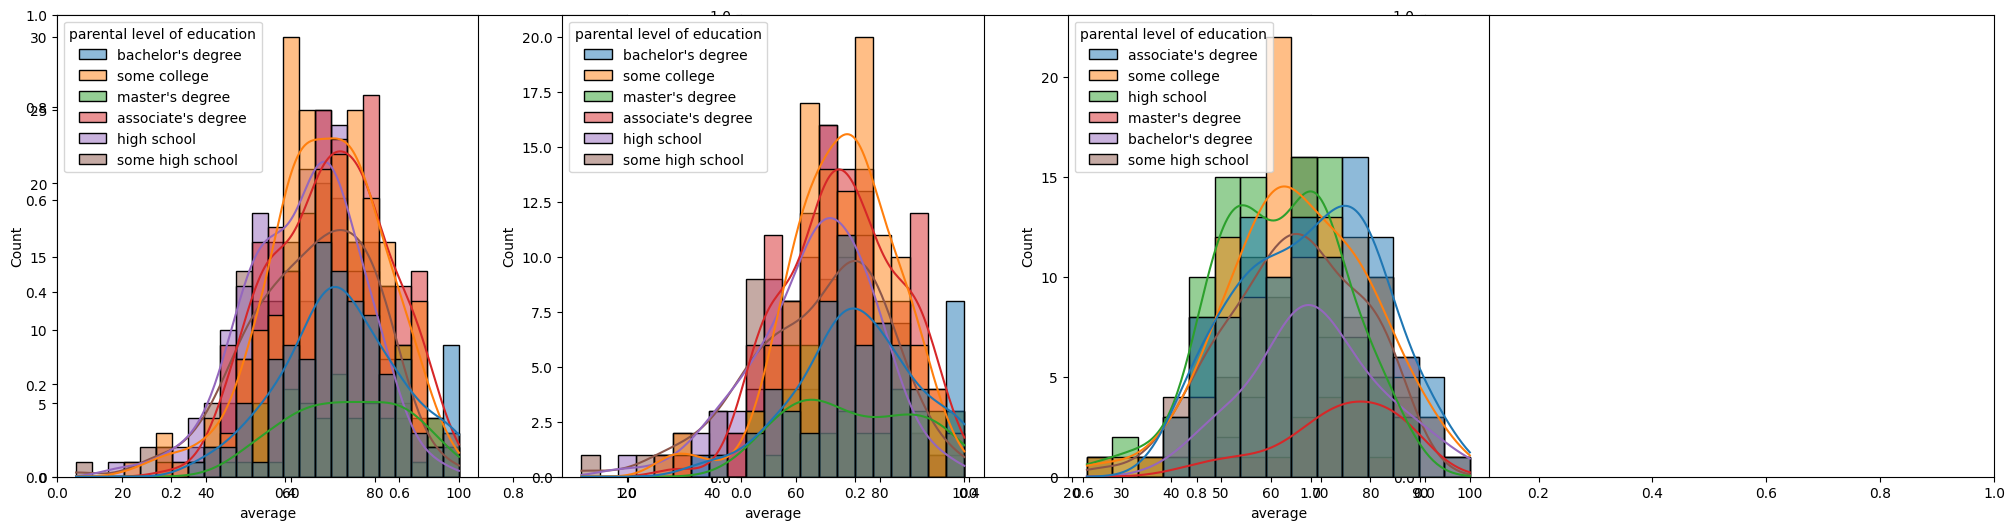

In [18]:
plt.subplots(1,3,figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education')
plt.show()

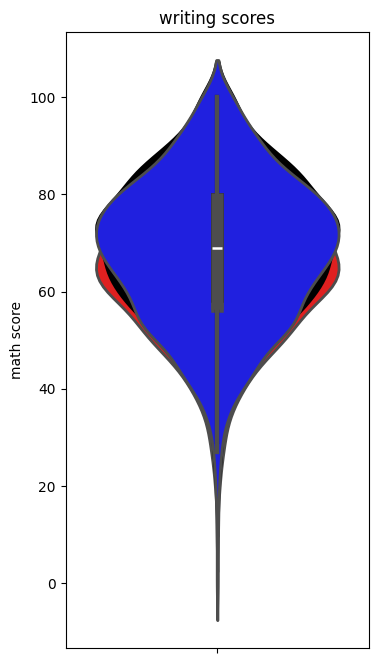

In [24]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title('math scores')
sns.violinplot(y='math score', data=df, color='red', linewidth=2)
plt.subplot(1, 4, 1)
plt.title('reading scores')
sns.violinplot(y='reading score', data=df, color='black', linewidth=2)
plt.subplot(1, 4, 1)
plt.title('writing scores')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=2)
plt.show()

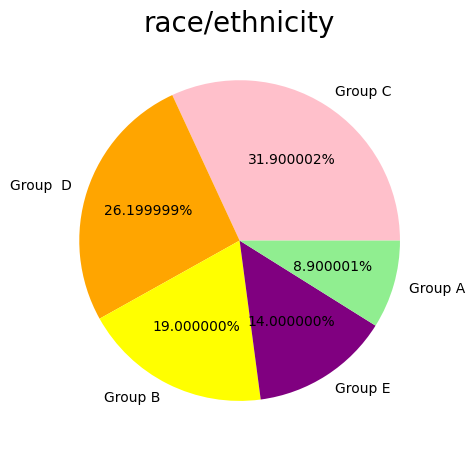

In [36]:
plt.rcParams['figure.figsize'] = (30,12)



plt.subplot(1, 5, 1)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group  D', 'Group B', 'Group E', 'Group A'
color = ['pink', 'orange', 'yellow', 'purple', 'lightgreen']

plt.pie(size, colors = color, labels = labels, autopct = '%2f%%')
plt.title('race/ethnicity', fontsize = 20)
plt.axis('On')

plt.show()

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

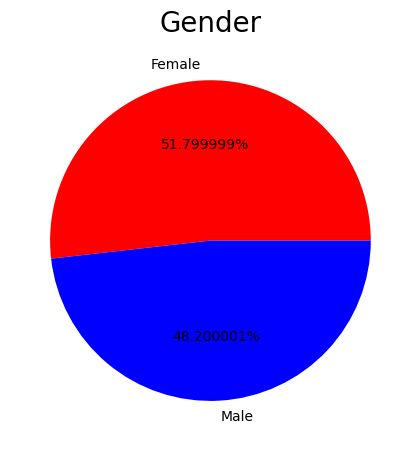

In [37]:
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['Red', 'Blue']

plt.pie(size, colors = color, labels = labels, autopct = '%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')